# Statistical Concept (Youtube dataset)



# Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
youtube = pd.read_csv('USdata.csv')

In [3]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

# Filter Outlier (IQR Method)

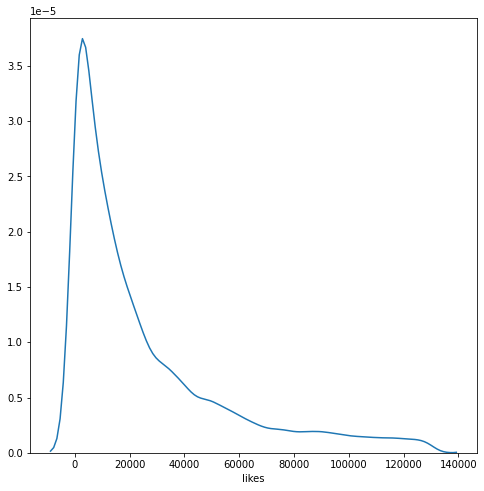

In [4]:
# Filter outlier, menggunakan IQR (non-parametric)

Q1_like = youtube['likes'].describe()['25%']
Q3_like = youtube['likes'].describe()['75%']
IQR = Q3_like - Q1_like

plt.figure(figsize = (8,8))
sns.distplot(youtube[(youtube['likes'] >= Q1_like - (1.5*IQR)) & (youtube['likes'] <= Q3_like + (1.5 * IQR))]['likes'], hist = False)

out_like = youtube[(youtube['likes'] >= Q1_like - (1.5*IQR)) & (youtube['likes'] <= Q3_like + (1.5 * IQR))]['likes'].index

In [5]:
youtube['publish_time'].value_counts().head()

2018-05-18T14:00:04.000Z    50
2018-05-06T13:00:05.000Z    32
2018-05-13T18:03:56.000Z    30
2018-05-14T15:59:47.000Z    29
2018-05-13T19:00:25.000Z    29
Name: publish_time, dtype: int64

In [6]:
youtube_not = youtube.loc[out_like].copy()

# to_datetime

In [7]:
# youtube_not['trending_date'].apply(lambda x: print(x)).head()

In [8]:
youtube_not['trending_date'] = youtube_not['trending_date'].apply(lambda x: '{}.{}.{}'.format(x[0:2],x[6:],x[3:5]))
youtube_not['publish_time'] = youtube_not['publish_time'].apply(lambda x: x[:10])

In [9]:
pd.to_datetime(youtube_not['trending_date'])

0       2014-11-17
1       2014-11-17
3       2014-11-17
5       2014-11-17
6       2014-11-17
           ...    
40940   2014-06-18
40941   2014-06-18
40944   2014-06-18
40945   2014-06-18
40946   2014-06-18
Name: trending_date, Length: 35813, dtype: datetime64[ns]

In [10]:
youtube_not['publish_time'].value_counts()

2017-12-22    412
2018-02-05    389
2017-12-20    371
2018-05-08    344
2018-03-15    316
             ... 
2010-04-10      1
2018-06-14      1
2017-05-07      1
2017-03-31      1
2009-09-29      1
Name: publish_time, Length: 313, dtype: int64

In [11]:
youtube_not['trending_date'] = pd.to_datetime(youtube_not['trending_date'])
youtube_not['publish_time'] = pd.to_datetime(youtube_not['publish_time'])

youtube_not['trending_gap'] = youtube_not['trending_date'] - youtube_not['publish_time']
youtube_not['trending_gap'] = youtube_not['trending_gap'].apply(lambda x: x.days)  

In [12]:
youtube_not.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35813 entries, 0 to 40946
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                35813 non-null  object        
 1   trending_date           35813 non-null  datetime64[ns]
 2   title                   35813 non-null  object        
 3   channel_title           35813 non-null  object        
 4   category_id             35813 non-null  int64         
 5   publish_time            35813 non-null  datetime64[ns]
 6   tags                    35813 non-null  object        
 7   views                   35813 non-null  int64         
 8   likes                   35813 non-null  int64         
 9   dislikes                35813 non-null  int64         
 10  comment_count           35813 non-null  int64         
 11  thumbnail_link          35813 non-null  object        
 12  comments_disabled       35813 non-null  bool  

In [13]:
youtube_not['title_total_word'] = youtube_not['title'].apply(lambda x: len(x))
youtube_not['description_total_word'] = youtube_not['description'].apply(lambda x: len(str(x)))

# Histogram and Density plot

## Histogram

A great way to get started exploring a single variable is with the histogram. <b>A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis.</b>

>The binwidth is the most important parameter for a histogram and we should always try out a few different values of binwidth to select the best one for our data.

Text(0.5, 1.0, 'Trending Gap')

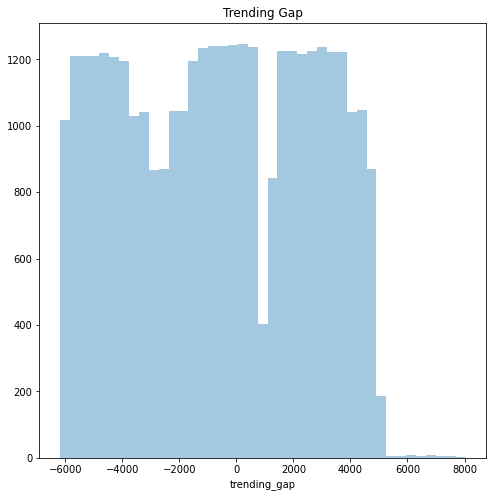

In [14]:
plt.figure(figsize = (8,8))
sns.distplot(youtube_not['trending_gap'], kde = False, hist = True)
plt.title('Trending Gap')

Text(0.5, 1.0, 'Trending Gap')

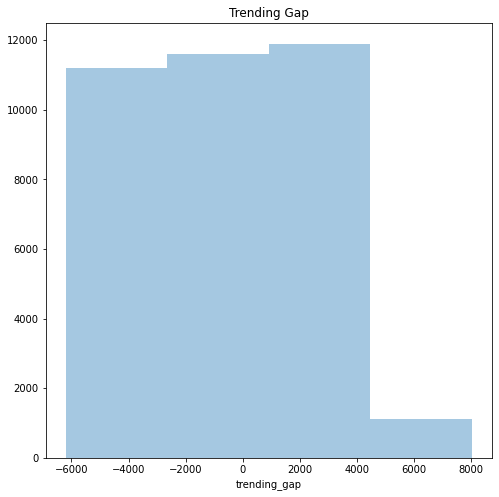

In [20]:
plt.figure(figsize = (8,8))
sns.distplot(youtube_not['trending_gap'], kde = False, hist = True, bins = 4) # Dipotong menjadi 4 bagian
plt.title('Trending Gap')

Text(0.5, 1.0, 'Trending Gap')

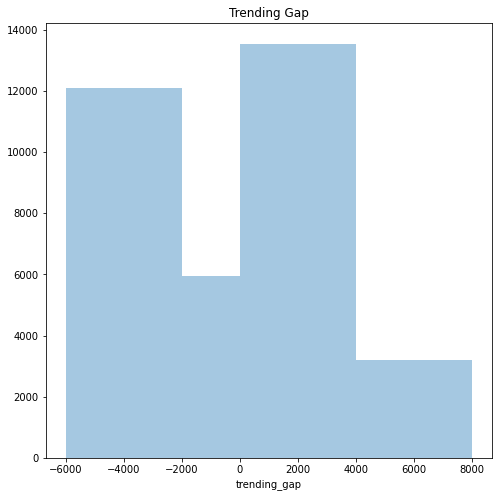

In [21]:
plt.figure(figsize = (8,8))
sns.distplot(youtube_not['trending_gap'], kde = False, hist = True, bins = [-6000, -2000, 0, 4000, 8000]) 
# Dipotong berdasarkan range [-6000, -2000, 0, 4000, 8000]
plt.title('Trending Gap')

> bins for trending_gap -6000 to -2000, -2000 to 0, 0 to 4000 and 4000 to 8000

## Density Plots

First, what is a density plot? A density plot is a smoothed, continuous version of a histogram estimated from the data. The most common form of estimation is known as kernel density estimation. In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point). 

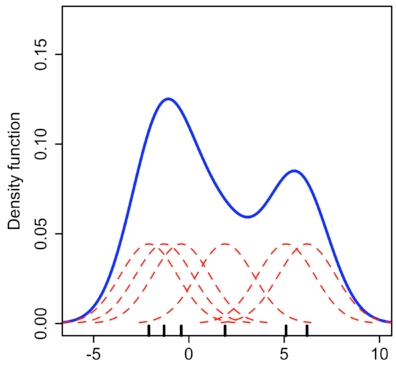

In [40]:
from IPython.display import Image
Image(filename='kernel.png') 

> Here, each small black vertical line on the x-axis represents a data point. The individual kernels (Gaussians in this example) are shown drawn in dashed red lines above each point. The solid blue curve is created by <b>summing the individual Gaussians and forms the overall density plot.</b>

The x-axis is the value of the variable just like in a histogram, but what exactly does the y-axis represent? 

<b>The y-axis in a density plot is the probability density function for the kernel density estimation.</b> However, we need to be careful to specify this is a <b>PROBABILITY DENSITY, NOT A PROBABILITY</b>. 

> The difference is the probability density is the probability per unit on the x-axis. To convert to an actual probability, <b>we need to find the area under the curve for a specific interval on the x-axis. Somewhat confusingly, because this is a probability density and not a probability,</b> the y-axis can take values greater than one. The only requirement of the density plot is that the total area under the curve integrates to one. I generally tend to think of the y-axis on a density plot as a value only for relative comparisons between different categories.

<b>The curve shows the density plot which is essentially a smooth version of the histogram. The y-axis is in terms of density, and the histogram is normalized by default so that it has the same y-scale as the density plot.</b>

Text(0.5, 1.0, 'Trending Gap')

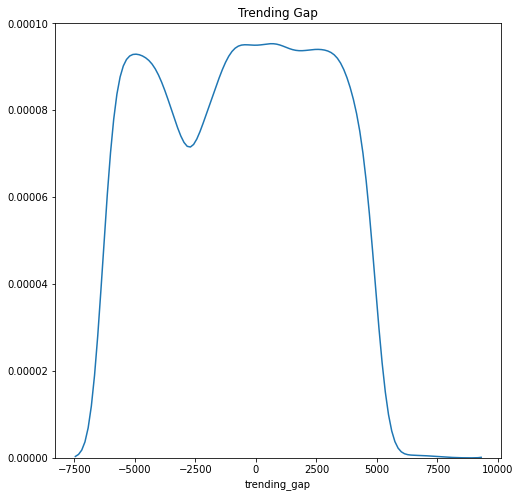

In [41]:
plt.figure(figsize = (8,8))
sns.distplot(youtube_not['trending_gap'], kde = True, hist = False)
plt.title('Trending Gap')

Text(0.5, 1.0, 'Title Total Word')

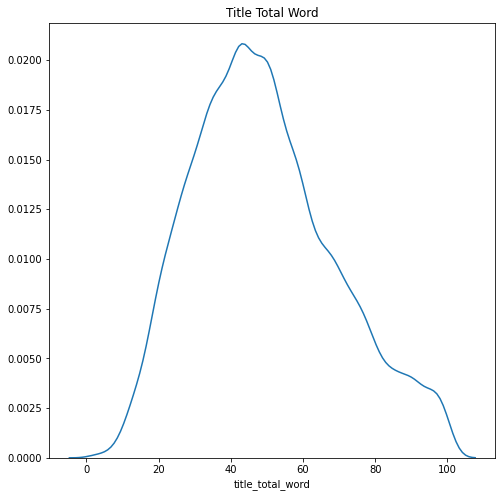

In [42]:
plt.figure(figsize = (8,8))
sns.distplot(youtube_not['title_total_word'], kde = True, hist = False)
plt.title('Title Total Word')

Text(0.5, 1.0, 'Description Total Word')

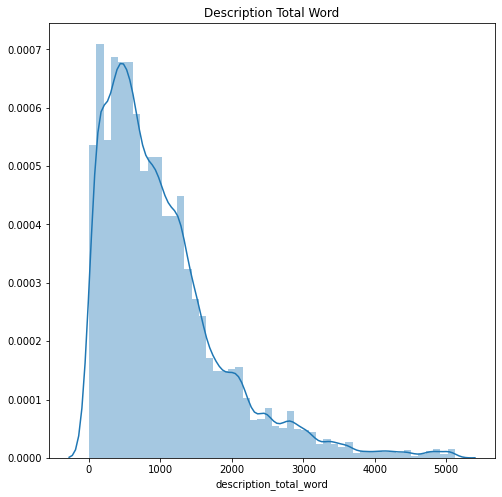

In [43]:
plt.figure(figsize = (8,8))
sns.distplot(youtube_not['description_total_word'])
plt.title('Description Total Word')

In [44]:
youtube_not[youtube_not['trending_gap'] > 1000]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,title_total_word,description_total_word
29,n30k5CwLhS4,2014-11-17,Nick Andopolis: Drummer,FaeryInLoveInc,1,2011-05-29,"freaks and geeks|""jason segel""|""judd apatow""|""...",50867,715,238,246,https://i.ytimg.com/vi/n30k5CwLhS4/default.jpg,False,False,False,"The opening of Freaks and Geeks Episode 6, I'm...",1268,23,60
139,vd4zwINEcLY,2014-11-17,Live in the now!,poofables,24,2011-03-27,"cash|""Wayne's""|""World""|""wayne""|""waynes""|""fende...",95085,909,52,193,https://i.ytimg.com/vi/vd4zwINEcLY/default.jpg,False,False,False,"Stop torturing yourself man, you'll never affo...",1331,16,69
250,qC0I5PEhkJo,2015-11-17,The perfect ice - Ice boats on Lake Geneva,MattMasonPhotography,17,2010-01-14,"Ice Boats|""Lake Geneva""|""5D Mark II""|""Fontana""...",94694,136,11,31,https://i.ytimg.com/vi/qC0I5PEhkJo/default.jpg,False,False,False,If you would like to see more of this kind of ...,2133,42,1341
304,n30k5CwLhS4,2015-11-17,Nick Andopolis: Drummer,FaeryInLoveInc,1,2011-05-29,"freaks and geeks|""jason segel""|""judd apatow""|""...",58469,828,253,271,https://i.ytimg.com/vi/n30k5CwLhS4/default.jpg,False,False,False,"The opening of Freaks and Geeks Episode 6, I'm...",1633,23,60
508,qC0I5PEhkJo,2016-11-17,The perfect ice - Ice boats on Lake Geneva,MattMasonPhotography,17,2010-01-14,"Ice Boats|""Lake Geneva""|""5D Mark II""|""Fontana""...",99999,143,12,32,https://i.ytimg.com/vi/qC0I5PEhkJo/default.jpg,False,False,False,If you would like to see more of this kind of ...,2499,42,1341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38143,EGV9Ms9EHcg,2031-05-18,LIGHTS OUT CHALLENGE IN FAZE RUG'S HAUNTED HOU...,OmarGoshTV,24,2018-05-08,"omargoshtv omargoshtv|""Omar gosh""|""dumpster di...",798988,51778,1853,7097,https://i.ytimg.com/vi/EGV9Ms9EHcg/default.jpg,False,False,False,Become an Omar Gosh Loyal FAMhttps://www.liver...,4758,61,1313
38144,mmP1aHJjJ-U,2031-05-18,Black Panther's Costume Designer Breaks Down T...,Vanity Fair,24,2018-05-08,"black panther|""black panther costume""|""black p...",460011,20216,269,957,https://i.ytimg.com/vi/mmP1aHJjJ-U/default.jpg,False,False,False,"On this episode of Notes on a Scene, Black Pan...",4758,84,562
38145,-e-xXN-tcFU,2031-05-18,Gallant - Doesn't Matter (Official Video),Gallant,10,2018-05-08,"gallant|""sogallant""|""new music""|""soul""|""r&b""|""...",618185,8683,516,1157,https://i.ytimg.com/vi/-e-xXN-tcFU/default.jpg,False,False,False,Stream/download Doesn't Matter: http://ad.gt/d...,4758,41,2439
38147,86ysRAffCpI,2031-05-18,VLOG 8 l Weekend Night Routine l Olivia Jade,Olivia Jade,26,2018-05-08,"olivia jade|""olivia jade vlogs""|""vlog 8 episod...",586898,22680,995,1054,https://i.ytimg.com/vi/86ysRAffCpI/default.jpg,False,False,False,MY WEEKEND NIGHT ROUTINE ft. family & friends ...,4758,44,657


<Figure size 576x576 with 0 Axes>

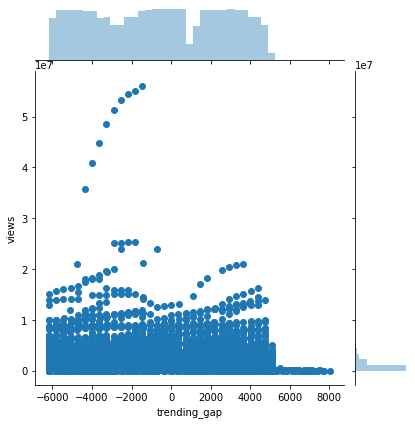

In [45]:
plt.figure(figsize = (8,8))
sns.jointplot(data = youtube_not, x = 'trending_gap', y = 'views')

<Figure size 576x576 with 0 Axes>

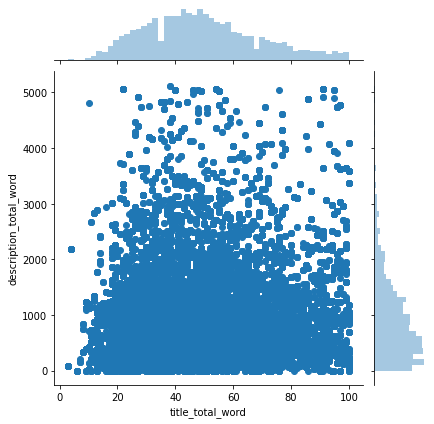

In [46]:
plt.figure(figsize = (8,8))
sns.jointplot(data = youtube_not, x = 'title_total_word', y = 'description_total_word')

# Boxplots

<img src="https://miro.medium.com/max/1400/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="800" height="800"/>

The image above is a boxplot. A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

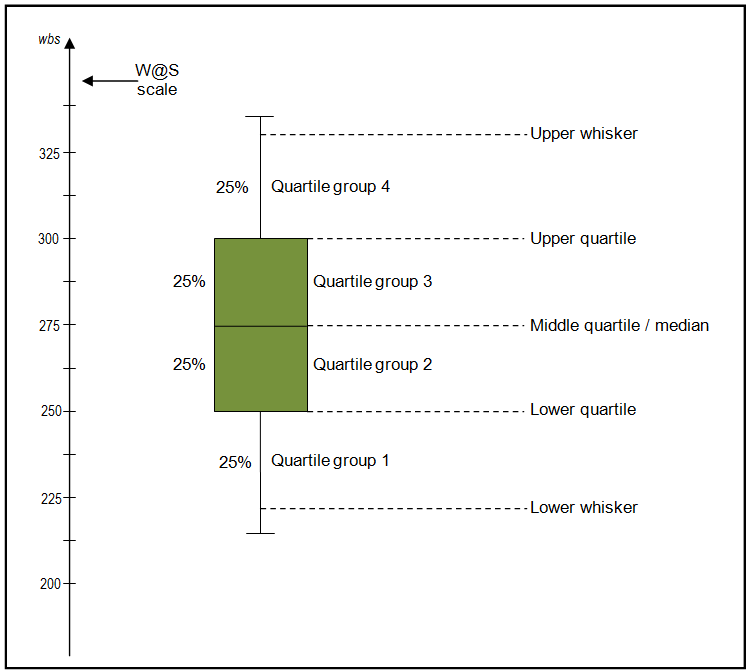

In [48]:
Image(filename='quartile.png') 

* The start of the box i.e the <b>lower quartile</b> represents the 25% of our data set.
* The box i.e the <b>upper quartile</b> represents 75% of our data.
* The difference between the lower quartile and upper quartile is called the <b>inter-quartile range (IQR)</b>. So basically the entire red box represents the inter-quartile range. IQR represent the variance of distribution.

## __Information from Boxplot__

### ``1. Box plots are useful as they show the average score of a data set``
The median is the average value from a set of data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value and half are less.

### ``2. Box plots are useful as they show the skewness of a data set``
The box plot shape will show if a statistical data set is normally distributed or skewed.

<img src='https://www.simplypsychology.org/bloxplots-skewed.jpg?ezimgfmt=rs:523x386/rscb19/ng:webp/ngcb19'>

When the median is in the middle of the box, and the whiskers are about the same on both sides of the box, then the distribution is symmetric.

When the median is closer to the bottom of the box, and if the whisker is shorter on the lower end of the box, then the distribution is positively skewed (skewed right).

When the median is closer to the top of the box, and if the whisker is shorter on the upper end of the box, then the distribution is negatively skewed (skewed left). 

### ``3. Box plots are useful as they show the dispersion of a data set``
In statistics, dispersion (also called variability, scatter, or spread) is the extent to which a distribution is stretched or squeezed.

> The IQR is used to measure how spread out the data points in a set are from the mean of the data set. The higher the IQR, the more spread out the data points; in contrast, the smaller the IQR, the more bunched up the data points are around the mean.

The interquartile range (IQR) is the box plot showing the middle 50% of scores and can be calculated by subtracting the lower quartile from the upper quartile (e.g. Q3−Q1). 

### ``4. Box plots are useful as they show outliers within a data set``
An outlier is an observation that is numerically distant from the rest of the data.

When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot.

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" width="800" height="800">

For example, outside 1.5 times the interquartile range above the upper quartile and below the lower quartile (Q1 - 1.5 * IQR or Q3 + 1.5 * IQR).

## How to compare boxplot? 

### The middle lines:

These are the medians, the “middle” values of each group. <b>If the median line of box A lies outside of box B entirely, then there is likely to be a difference between the two groups.</b>

<img src="https://blog.bioturing.com/wp-content/uploads/2018/05/overlapping-box.jpg" width="800" height="800">
    
> Description for the image: Boxes overlap but don’t spread past both medians: groups are likely to be different.


### The whiskers:

The lines coming out from each box extend from the maximum to the minimum values of each set. Together with the box, <b>the whiskers (or you can see IQR, cause whisker is dependent with the IQR) show how big a range there is between those two extremes. Larger ranges indicate wider distribution, that is, more scattered data.</b>

The same thing can be said about the boxes. Short boxes mean their data points consistently hover around the center values. Taller boxes imply more variable data. <b>That’s something to look for when comparing box plots, especially when the medians are similar.</b>

<img src="https://blog.bioturing.com/wp-content/uploads/2018/05/biovinci-box-plot.png" width="800" height="800">

### Outliers:

When there are outliers, <b>they are dotted outside the whiskers.</b> Not all datasets have outliers. Data points have to go above or below the box pretty far to count as outliers. How far? 1.5 times the size of the box.

### To Sum up:

That’s a quick and easy way to compare two box-and-whisker plots. First, look at the boxes and median lines to see if they overlap. Then check the sizes of the boxes and whiskers to have a sense of ranges and variability. Finally, look for outliers if there are any.

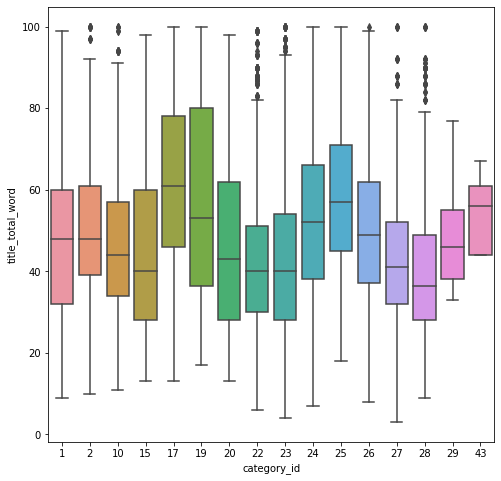

In [49]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'category_id', y = 'title_total_word', data = youtube_not)

<b>I prefer This one</b>

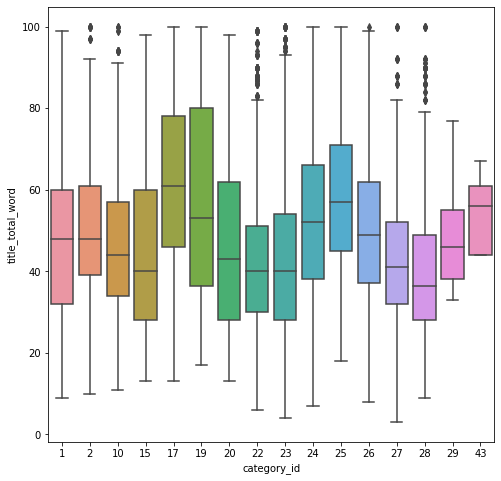

In [50]:
plt.figure(figsize = (8,8))
sns.boxplot(x = youtube_not['category_id'], y = youtube_not['title_total_word'])

# Correlation Coeff

1. <b>Correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other.</b> For example, shoe sizes go up in (almost) perfect correlation with foot length. <br>
2. <b>A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other.</b> For example, the amount of gas in a tank decreases in (almost) perfect correlation with speed. <br>
3. <b>Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related.</b> 

## Illustration

If you analyze any two features of a dataset, then you’ll find some type of correlation between those two features. Consider the following figures:

![corr](https://files.realpython.com/media/py-corr-1.d13ed60a9b91.png)

Each of these plots shows one of three different forms of correlation:

-    **Negative correlation (red dots)**: In the plot on the left, the y values tend to decrease as the x values increase. This shows strong negative correlation, which occurs when large values of one feature correspond to small values of the other, and vice versa.

-    **Weak or no correlation (green dots)**: The plot in the middle shows no obvious trend. This is a form of weak correlation, which occurs when an association between two features is not obvious or is hardly observable.

-    **Positive correlation (blue dots)**: In the plot on the right, the y values tend to increase as the x values increase. This illustrates strong positive correlation, which occurs when large values of one feature correspond to large values of the other, and vice versa.


> **``Note``**: When you’re analyzing correlation, you should always have in mind that ``correlation does not indicate causation``. It quantifies the strength of the relationship between the features of a dataset. Sometimes, the association is caused by a factor common to several features of interest.

## Pearson

The Pearson correlation coefficient measures the <b>linear relationship between two datasets.</b>

We will explore this later!

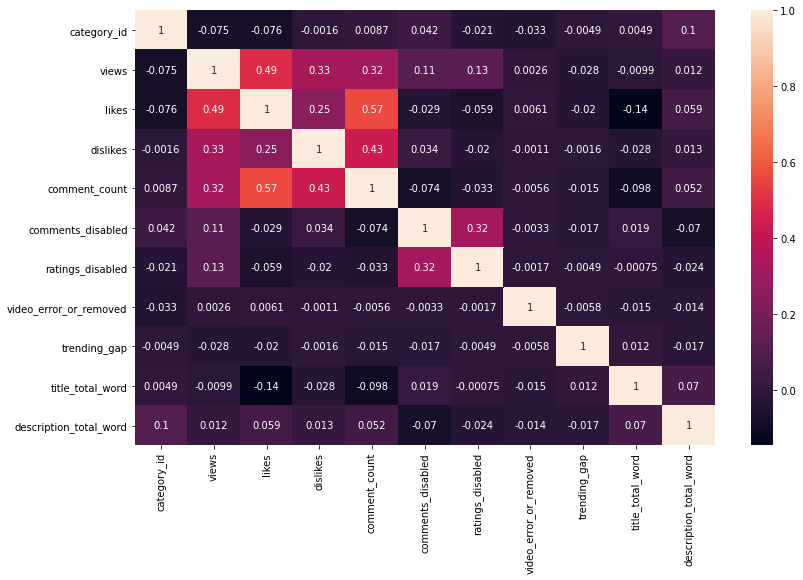

In [52]:
plt.figure(figsize = (13,8))
sns.heatmap(youtube_not.corr('pearson'), annot = True)

## Spearman

The Spearman correlation is a <b>nonparametric measure of the monotonicity of the relationship (non-linear relationship) between two datasets</b>.

We will explore this later!

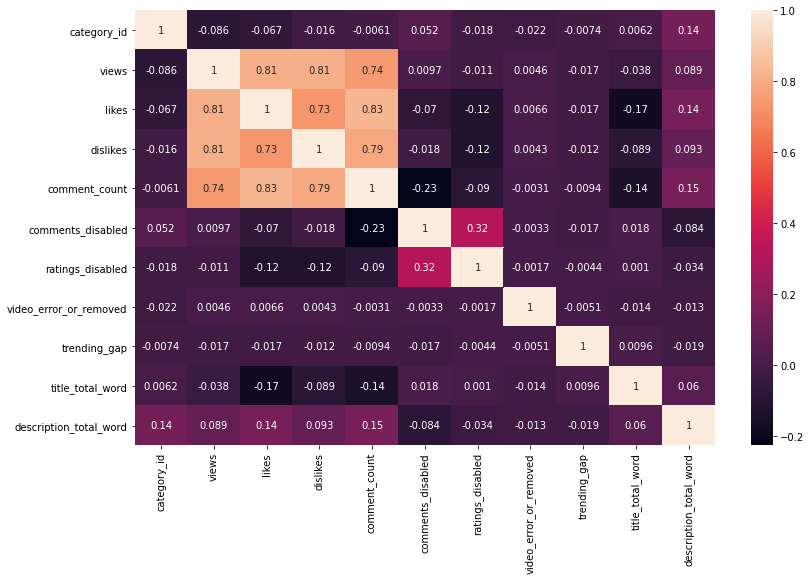

In [53]:
plt.figure(figsize = (13,8))
sns.heatmap(youtube_not.corr('spearman'), annot = True)

# Question

Why do you think there is a trend video that did not had no difference at all between the number of the likes and dislikes? Is there any interesting pattern from the data you could find? Show it with the data and visual if you find it interesting


In [53]:
youtube

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [54]:
youtube['trending_date'] = youtube['trending_date'].apply(lambda x: '20{}-{}-{}'.format(x[0:2],x[6:],x[3:5] ))
youtube['publish_time'] = youtube['publish_time'].apply(lambda x: x[:10])
youtube['trending_date'] = pd.to_datetime(youtube['trending_date'])
youtube['publish_time'] = pd.to_datetime(youtube['publish_time'])
youtube['trending_gap'] = youtube['trending_date'] - youtube['publish_time']
youtube['trending_gap'] = youtube['trending_gap'].apply(lambda x: x.days)  
youtube['title_total_word'] = youtube['title'].apply(lambda x: len(x))
youtube['description_total_word'] = youtube['description'].apply(lambda x: len(str(x)))

In [55]:
youtube['like_delta'] = youtube['likes'] - youtube['dislikes']

In [56]:
youtube_0_delta = youtube[youtube['like_delta'] == 0]

In [57]:
corr = youtube_0_delta.corr()
plt.figure(figsize = (10,10))
corr.style.background_gradient(cmap='Blues')

/home/user/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/home/user/anaconda3/lib/python3.7/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_gap,title_total_word,description_total_word,like_delta
category_id,1.000000,0.114844,-0.159433,-0.159433,-0.196357,0.278785,0.079138,nan,-0.356690,-0.250505,0.200158,nan
views,0.114844,1.000000,-0.079479,-0.079479,-0.106202,0.231003,0.092599,nan,-0.080708,-0.408952,-0.159467,nan
likes,-0.159433,-0.079479,1.000000,1.000000,-0.084034,-0.271944,-0.858440,nan,0.557499,-0.263152,-0.182731,nan
dislikes,-0.159433,-0.079479,1.000000,1.000000,-0.084034,-0.271944,-0.858440,nan,0.557499,-0.263152,-0.182731,nan
comment_count,-0.196357,-0.106202,-0.084034,-0.084034,1.000000,-0.439367,0.098076,nan,-0.088242,0.230828,-0.149655,nan
comments_disabled,0.278785,0.231003,-0.271944,-0.271944,-0.439367,1.000000,0.316789,nan,-0.072454,-0.171503,0.283085,nan
ratings_disabled,0.079138,0.092599,-0.858440,-0.858440,0.098076,0.316789,1.000000,nan,-0.428728,0.317386,0.216506,nan
video_error_or_removed,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
trending_gap,-0.356690,-0.080708,0.557499,0.557499,-0.088242,-0.072454,-0.428728,nan,1.000000,-0.127838,0.107619,nan
title_total_word,-0.250505,-0.408952,-0.263152,-0.263152,0.230828,-0.171503,0.317386,nan,-0.127838,1.000000,-0.083470,nan


<Figure size 720x720 with 0 Axes>

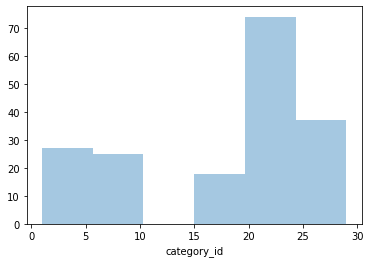

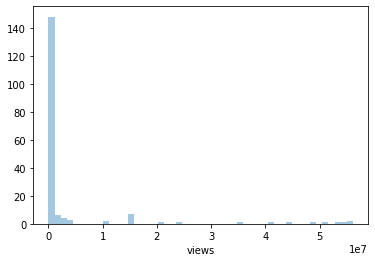

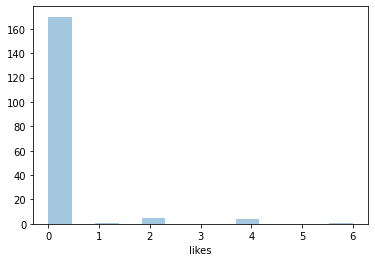

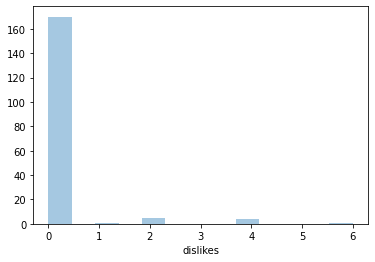

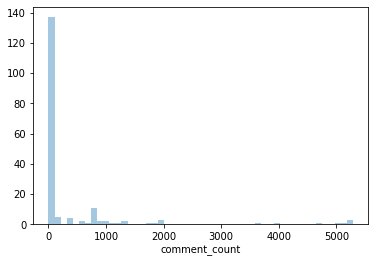

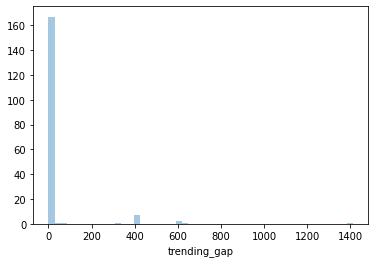

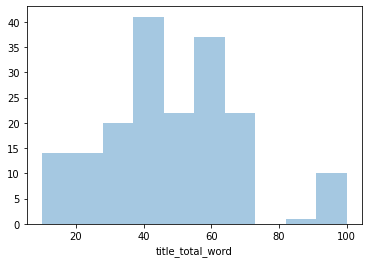

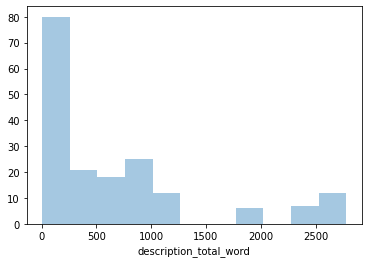

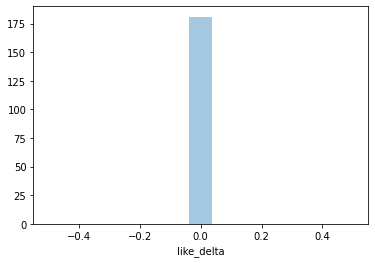

In [58]:
for i in youtube_0_delta.select_dtypes('number').columns:
    sns.distplot(youtube_0_delta[i], kde = False)
    plt.show()

In [59]:
youtube_delta = youtube[youtube['like_delta'] != 0]

In [60]:
youtube['trending_gap'].describe()

count    40949.000000
mean        16.810423
std        146.014303
min          0.000000
25%          3.000000
50%          5.000000
75%          9.000000
max       4215.000000
Name: trending_gap, dtype: float64

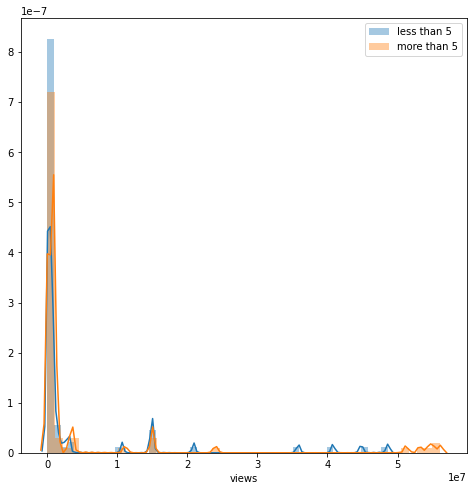

In [61]:
#youtube_0_delta itu data dimana youtube sudah difilter yang deltanya 0 (like - dislike)
plt.figure(figsize = (8, 8))
sns.distplot(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], label = 'less than 5')
sns.distplot(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'], label = 'more than 5')

plt.legend()

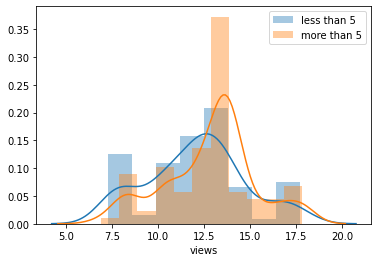

In [62]:
#data transformation with Log
#Membuat distplot terlihat distribusi normal
sns.distplot(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views']), label = 'less than 5')
sns.distplot(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views']), label = 'more than 5')
plt.legend()

# Kurtosis and Skewness

In [63]:
from scipy.stats import skew, kurtosis

## Skewness

* A positive skew could be good or bad, depending on the mean.  A positive mean with a positive skew is good, while a negative mean with a positive skew is not good.  If a data set has a positive skew, but the mean of the returns is negative, it means that overall performance is negative, but the outlier months are positive. 
* A negative skew is generally not good, because it highlights the risk of left tail events or what are sometimes referred to as “black swan events.” While a consistent and steady track record with a positive mean would be a great thing, if the track record has a negative skew then you should proceed with caution. 

In [64]:
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
# If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
# If the skewness is less than -1 or greater than 1, the data are highly skewed

skew(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'])

3.410248962115494

## Kurtosis

Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. <b>It is actually the measure of outliers present in the distribution.</b>

Kurtosis is a statistical measure that defines how heavy the tails of a distribution differ from the tails of a normal distribution. In other words, <b>kurtosis identifies whether the tails of a given distribution contain extreme values.</b>

<b> kurtosis statistic measures outliers (rare, extreme observations in the case of data; potential rare, extreme observations in the case of a pdf) </b>

<b>Important: 

Positive kurtosis indicates one or more outliers that are far from the center. A heavy-tailed distribution has large kurtosis. The canonical distribution that has a large positive kurtosis is the t distribution with a small number of degrees of freedom. Some heavy-tailed distributions have infinite kurtosis. 

Negative kurtosis for a sample indicates that the sample contains many observations that are a moderate distance from the center and few outliers that are far from the center.</b>

### Type of kurtosis

<b>Mesokurtic</b>

Data that follows a mesokurtic distribution shows an excess kurtosis of zero or close to zero. It means that if the data follows a normal distribution, it follows a mesokurtic distribution.



<b>Leptokurtic</b> <br>
Leptokurtic indicates a positive excess kurtosis. The leptokurtic distribution shows heavy tails on either side, indicating the large outliers. In finance, a leptokurtic distribution shows that the investment returns may be prone to extreme values on either side. Therefore, an investment whose returns follow a leptokurtic distribution is considered to be risky.

Distributions with large kurtosis exhibit tail data exceeding the tails of the normal distribution (e.g., five or more standard deviations from the mean).

For investors, high kurtosis of the return distribution implies that the investor will experience occasional extreme returns (either positive or negative), more extreme than the usual + or - three standard deviations from the mean that is predicted by the normal distribution of returns. This phenomenon is known as <i>kurtosis risk</i>.


<b> Platykurtic </b> <br>
A platykurtic distribution shows a negative excess kurtosis. The kurtosis reveals a distribution with flat tails. The flat tails indicate the small outliers in a distribution. In the finance context, the platykurtic distribution of the investment returns is desirable for investors because there is a small probability that the investment would experience extreme returns.



<img src="kurtosis-student1927.gif" alt="Trulli" style="width:100%">

In [65]:
# If the kurtosis is close to 0, then a normal distribution is often assumed.  These are called mesokurtic distributions.  
# If the kurtosis is less than 0, then the distribution is light tails and is called a platykurtic distribution.  
# If the kurtosis is greater than 0, then the distribution has heavier tails and is called a leptokurtic distribution.
# Ketajaman dari ujung distribusi, makin tajam makin kecil persebaran datanya (variansi atau std. dev)

kurtosis(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'])

10.342818328545338

# QQ-PLOT

Q Q Plots (Quantile-Quantile plots) are plots of two quantiles against each other. A quantile is a fraction where certain values fall below that quantile. For example, the median is a quantile where 50% of the data fall below that point and 50% lie above it. The purpose of Q Q plots is <b>to find out if two sets of data come from the same distribution</b>. A 45 degree angle is plotted on the Q Q plot; <b> if the two data sets come from a common distribution, the points will fall on that reference line. </b><br>

In our case, we use Normal Distribution.

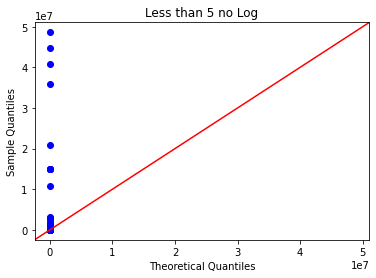

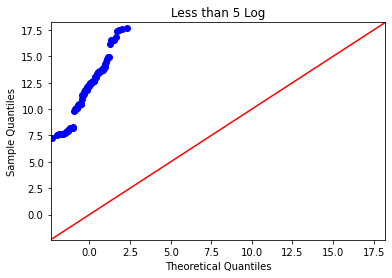

In [66]:
import statsmodels.api as sm
import pylab

sm.qqplot(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], line = '45')
plt.title('Less than 5 no Log')

sm.qqplot(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views']), line = '45')
plt.title('Less than 5 Log')
pylab.show()

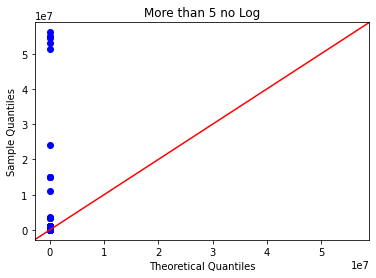

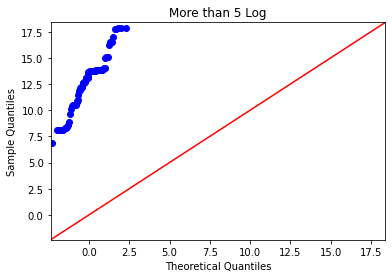

In [67]:
sm.qqplot(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'], line = '45')
plt.title('More than 5 no Log')

sm.qqplot(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views']), line = '45')
plt.title('More than 5 Log')
pylab.show()

# Introduction To Hypothesis Testing 

Hypothesis testing is a method for testing a statistical hypothesis about a <b>parameter in a population, using data measured in a sample.</b>


> Statistical Hypothesis -> <b>A premise, claim, or statement about the parameters (usually) describing a population (not a sample) that we want to test.</b>

To understand hypothesis testing, there’s some terminology that you have to understand:

<b>- Null Hypothesis</b> ($H_{0}$) : The hypothesis that sample observations result purely from chance (by coincidence). The null hypothesis tends to state that there’s no change.<br>
<b>- Alternative Hypothesis</b> ($H_{1}$) : The hypothesis that sample observations are influenced by some non-random cause.<br>
<b>- P-value</b>: The probability of obtaining the observed results of a test, assuming that the null hypothesis is correct; <i>a smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.</i><br>
<b>- alpha ($\alpha$)</b>: The significance level; the probability of rejecting the null hypothesis when it is true — also known as Type 1 error.

> In general, we use $\alpha = 0.5$ and confidence level (CL) is 0.95 cause $CL = 1-\alpha$

<img src='https://dataz4s.com/wp-content/uploads/2020/03/01.-Significance-level.jpg'>

## Null Hypothesis and Alternative Hypothesis (In further)

<i>This is the question you need to ask, to your sample: Is this significant? Could this sample just be the result of chance?</i>

In general, <b>the null hypothesis</b> is that things are the same as each other, or the same as a theoretical expectation. The alternative hypothesis</b> is that things are <b>different from each other, or different from a theoretical expectation.</b>


### In mathematical term

<b>- Null Hypothesis</b> ($H_{0}$) : <b>The null hypothesis states that a population parameter is equal to a value.</b> The null hypothesis is often an initial claim that researchers specify using previous research or knowledge.<br>
<b>- Alternative Hypothesis</b> ($H_{1}$) : <b>There is going on. The hypothesis that sample observations are influenced by some non-random cause.<br></b>


### Intuitively Speaking

<b>- Null Hypothesis</b> ($H_{0}$) : <b>There is nothing going on.</b> <i>E.g. the promotion and gender are independent. There is no gender discrimination.</i> And, <b>the observed difference in proportions is simply due to chance.</b><br>
<b>- Alternative Hypothesis</b> ($H_{1}$) : <b>There is going on. The hypothesis that sample observations are influenced by some non-random cause.<br></b>

### Or my favorite one (From R.Fisher)

<b>- Null Hypothesis</b> ($H_{0}$) : Type of hypothesis used in statistics that proposes that <b>no statistical significance exists</b> in a set of given observations (samples)<br>
<b>- Alternative Hypothesis</b> ($H_{1}$) : Type of hypothesis used in statistics that proposes that <b>statistical significance exists</b> in a set of given observations (samples)<br>

<i>In principle, a statistically significant result (usually a difference) is a result that's not attributed to chance (or we can say our result is not come from a coincidence).</i>

### If you still confused about the definition

<b>The null hypothesis is, in general, the boring stuff i.e. it assumes that nothing interesting happens/happened.

The alternative hypothesis is, where the action is i.e. some observation/ phenomenon is real (i.e. not a fluke) and statistical analysis will give us more insights on that.</b>

## A Little story...

Not so long ago, people believed that the world was flat.
<br>
* <b>Null hypothesis,</b> $H_{0}$: The world is flat.<br>
* <b>Alternate hypothesis</b>: The world is round.<br>

Several scientists, including Copernicus, set out to disprove the null hypothesis. This eventually led to the rejection of the null and the acceptance of the alternate. Most people accepted it — the ones that didn’t created the Flat Earth Society!. What would have happened if Copernicus had not disproved the it and merely proved the alternate? No one would have listened to him. <b>In order to change people’s thinking, he first had to prove that their thinking was wrong.</b>


>  Researchers work to reject, nullify or disprove the null hypothesis. Researchers come up with an alternate hypothesis, one that they think explains a phenomenon, and then <b>work to reject the null hypothesis.</b>


> <i>There are two possible outcomes: if the result confirms the hypothesis, then you’ve made a measurement. If the result is contrary to the hypothesis, then you’ve made a discovery — Enrico Fermi</i>

# The Goodness Of Fit (Normality Test)

The goodness of fit test is used <b> to test if sample data fits a distribution from a certain population </b> (i.e. a population with a normal distribution or one with a Weibull distribution). In other words, it tells you <b> if your sample data represents the data you would expect to find in the actual population </b>. Goodness of fit tests commonly used in statistics are:
<br>
1. The Chi-Square 
<br>
2. Anderson-Darling
<br>
3. Shipiro-Wilk
<br> 

In this notebook, we always use the goodness of fit for <b>normality test</b>.

In [68]:
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro (P-value)': shapiro(data)[1], 
     'K^2 (P-value)': normaltest(data)[1]}
    result['Anderson']['Test statistic'] = anderson(data)[0]
    return result

## Anderson-Darling

The Anderson-Darling Goodness of Fit Test (AD-Test) is a measure of how well your data fits a specified distribution. It’s <b>commonly used as a test for <i>normality</i>.</b>

Assumption of <i>normality</i> means that <b>you should make sure your data roughly fits a bell curve shape before running certain statistical tests or regression.</b> 

<i>Anderson-Darling test for data coming from a particular distribution.

The Anderson-Darling tests <b>the null hypothesis that a sample is drawn from a population that follows a particular distribution.</b> For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.</i>

Interpretation (In default case):<br>

$H_{0}$: the data has a Normal distribution. <br>
$H_{1}$: the data does not have a Normal distribution.




In [69]:
# Anderson is stat < critical value for accepting H0 (fail to reject H0) when data = is normal distributed (or the designed dist)
# Anderson is stat > critical value for rejecting H0 (Accept H1) when data =/= is normal distributed (or the designed dist)

anderson(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'])

AndersonResult(statistic=24.025769591399637, critical_values=array([0.554, 0.63 , 0.756, 0.882, 1.049]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Goodnes fit of test, <b>apapun yang menguji data kita mengikuti suatu distribusi dinamakan goodness fit of test.</b> <br>
$H_{0}$ : Data mengikuti Distribusi yang ditentukan (ex: Normal) <br>
$H_{1}$: Data tidak mengikuti distribusi yang ditentukan

In [70]:
#Goodnes fit of test, apapun yang menguji data kita mengikuti suatu distribusi dinamakan goodness fit of test
#H0 : Data mengikuti Distribusi yang ditentukan (ex: Normal)
#H1: Data tidak mengikuti distribusi yang ditentukan 

try_normal(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'])

{'Anderson': {15.0: 0.554,
  10.0: 0.63,
  5.0: 0.756,
  2.5: 0.882,
  1.0: 1.049,
  'Test statistic': 24.025769591399637},
 'Shapiro (P-value)': 7.157133100820156e-18,
 'K^2 (P-value)': 1.095663548153668e-21}

## Shapiro-Wilk 

The Shapiro-Wilk test is a way to tell <b> if a random sample comes from a normal distribution.</b> The test gives you a $W$ value; small values indicate your sample is not normally distributed (you can reject the null hypothesis that your population is normally distributed if your values are under a certain threshold). The test-statistics ($W$) is:

$$W = \frac{\left (\sum_{i=1}^{n}a_{i}x_{i}  \right )^{2}}{\sum_{i=1}^{n}\left ( x_{i}-\bar{x} \right )^{2}}$$

where: <br>
$x_{i}$ are the ordered random sample values <br>
$a_{i}$ are constants generated from the covariances, variances and means of the sample (size n) from a normally distributed sample.
<br><br>
Interpretation:
<br>
$H_{0}$: the data has a Normal distribution. <br>
$H_{1}$: the data does not have a Normal distribution.


In [71]:
#Hasilnya (Critical Value, P-value)
shapiro(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'])

(0.3813357949256897, 7.157133100820156e-18)

In [72]:
try_normal(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views']))

{'Anderson': {15.0: 0.554,
  10.0: 0.63,
  5.0: 0.756,
  2.5: 0.882,
  1.0: 1.049,
  'Test statistic': 0.8879275990190933},
 'Shapiro (P-value)': 0.012300082482397556,
 'K^2 (P-value)': 0.7320825848821937}

In [73]:
try_normal(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'])

{'Anderson': {15.0: 0.553,
  10.0: 0.63,
  5.0: 0.755,
  2.5: 0.881,
  1.0: 1.048,
  'Test statistic': 23.93192998869587},
 'Shapiro (P-value)': 1.1025540015556059e-17,
 'K^2 (P-value)': 1.0782682018831201e-19}

# Non-Parametric (Definition)
<b>If the data does not have the familiar Gaussian distribution, we must resort to nonparametric version of the significance tests. </b> These tests operate in a similar manner, but are distribution free, requiring that real valued data be first transformed into rank data before the test can be performed.

# Tests of significance Difference (Independence Test)

<b>Tests of significance are used to tell us whether the differences between the two sets of sample data are truly significant or whether these differences could have occurred by CHANCE.</b> Tests of significance tell us the probability level that differences between the two areas, X and Y are due to chance.

## T-Test Independent
<i>(For Parametric)</i>

The Independent Samples T-Test compares two sample means to determine <b>whether the population means are significantly different.</b> 

<b>Assumptions:</b>


* <b>Assumption of Independence</b>: you need two independent, categorical groups that represent your independent variable. In example, test scores “males” or “females” would be your independent variable.
* <b>Assumption of normality</b>: the dependent variable should be approximately normally distributed. The dependent variable should also be measured on a continuous scale. In the above example on average test scores, the “test score” would be the dependent variable.
* <b>Assumption of Homogeneity of Variance</b>: The variances of the dependent variable should be equal. Testable using F-test, Levene's test, Bartlett's test, or the Brown–Forsythe test; or assessable graphically using a Q–Q plot.

<br>
Interpretation:
<br>
$H_{0}$: the means of the Population are equal. <br>
$H_{1}$: the means of the Population are unequal. 
<br>

Fail to Reject $H_{0}$: Population distributions are equal.<br>
Reject $H_{0}$: Population distributions are not equal.

In [74]:
#H0 : Tidak ada perbedaan view saat trending gap <= 5 dan trending gap > 5 
from scipy.stats import ttest_ind
result = list(ttest_ind(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], 
                        youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'], equal_var = False))
print('T-Statistic:', result[0])
print('P-Value:', result[1])

T-Statistic: -0.7967728770579731
P-Value: 0.42675683593878566


In [75]:
from scipy.stats import ttest_ind
result = list(ttest_ind(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views']), 
                        np.log(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'])))
print('T-Statistic:', result[0])
print('P-Value:', result[1])

T-Statistic: -2.0201551112371248
P-Value: 0.044858119610026635


## Mann-Whitney U Test

<i>(For Non-Parametric)</i><br>

The Mann-Whitney U test <b>determines whether there is a statistically significant difference between TWO unrelated, independent groups on a dependent variable.</b>

<b> <i>The Mann-Whitney U test is the nonparametric equivalent to the independent T-test </i> and the appropriate analysis to compare differences that come from the same population when the dependent variable is ordinal (Leech, Barrett & Morgan, 2005).</b>

<b>Assumptions:</b>


* <b>The dependent variable should be measured on an ordinal scale or a continuous scale.</b>
* <b>The independent variable should be two independent, categorical groups.</b>
* <b>Observations should be independent.</b> In other words, there should be no relationship between the two groups or within each group.
* <b>Observations are not normally distributed.</b> However, they should follow the same shape (i.e. both are bell-shaped and skewed left).


Interpretation:
<br>
$H_{0}$: the medians of the Population are equal. <br>
$H_{1}$: the medians of the Population are unequal. 
<br>

Fail to Reject $H_{0}$: Population distributions are equal.<br>
Reject $H_{0}$: Population distributions are not equal.



In [76]:
#Non-Parametric Test jika asumsi untuk Parametric Test tidak terpenuhi
#mannwhitneyu test sebanding dengan independent t-test dalam artian melihat perbedaan satu kelompok dengan kelompok lainnya.
#Non-Parametric tests are valid when our sample size is small and your data are potentially nonnormal
#H0 : Tidak berpengaruh
from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], 
                        youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 3088.0
P-Value: 0.002163358584802804


# Test for Equality of Variances


## Bartlett's Test 
(For <i>parametric</i>)

Bartlett’s test for homogeneity of variances is used to test that variances are equal for all samples. 


## Levene's Test
(<i>For non-parametric</i>)

Levene’s test is used to check that variances are equal for all samples when your data comes from a <b>non normal distribution</b>. 


<br>
Interpretation:
<br>
$H_{0}$: The variances are equal for all samples. <br>
$H_{1}$: The variances are not equal for one pair or more.
<br>

In [77]:
from scipy.stats import levene, bartlett 

#Bartlett and Levene are test to see if the both sample have equal variance or not.
#Both test have H0: Equal Variance and H1: The Variance between the group is different

#We use the Bartlett test if the samples are come from the Normal Distribution and Levene test if the sample skewed or
#deviate from the Normal Distribution

#Levene for non-parametric

def try_equal_var(x1,x2):
    result = {'Bartlett': {'Bartlett-Stat' : bartlett(x1,x2)[0], 'P-value': bartlett(x1,x2)[1]},
             'Levene': {'Levene-Stat': levene(x1,x2)[0], 'P-Value': levene(x1,x2)[1]}}
    return result

try_equal_var(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'],
             youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'])

{'Bartlett': {'Bartlett-Stat': 8.615008091273664,
  'P-value': 0.0033340431598864596},
 'Levene': {'Levene-Stat': 0.5408472132471811, 'P-Value': 0.46304432742841817}}

In [78]:
bartlett(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'],
             youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'])

BartlettResult(statistic=8.615008091273664, pvalue=0.0033340431598864596)

In [79]:
levene(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'],
             youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'])

LeveneResult(statistic=0.5408472132471811, pvalue=0.46304432742841817)

<b>Bisa lebih dari 2 group juga untuk menguji Variance Equal</b>

In [80]:
youtube20 = youtube[youtube['category_id'] == 20]
youtube29 = youtube[youtube['category_id'] == 29]
youtube10 = youtube[youtube['category_id'] == 10]

levene(youtube10['views'], youtube29['views'], youtube20['views'])

LeveneResult(statistic=25.10777442642818, pvalue=1.358148958520443e-11)

In [81]:
bartlett(youtube10['views'], youtube29['views'], youtube20['views'])

BartlettResult(statistic=1793.1708442941126, pvalue=0.0)

# Question
Saya pernah membaca bahwa Trend video juga tergantung kategori, jika kita barplot kan category 10 dan 29 memiliki mean yang tertinggi (walau mean dari 29 besar jaraknya) berarti mereka menarik banyak view. Tetapi apakah mereka berbeda secara view, like, dan dislikesnya?

In [82]:
youtube.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'trending_gap',
       'title_total_word', 'description_total_word', 'like_delta'],
      dtype='object')

In [83]:
youtube10 = youtube[youtube['category_id']==10]
youtube29 = youtube[youtube['category_id']==29]

In [84]:
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro (P-value)': shapiro(data)[1], 
     'K^2 (P-value)': normaltest(data)[1]}
    result['Anderson']['Test statistic'] = anderson(data)[0]
    return result

Text(0.5, 1.0, 'Category_10')

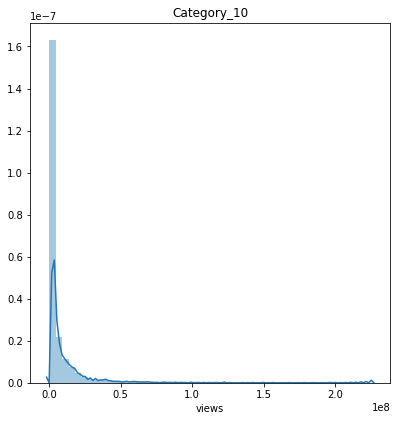

In [85]:
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
sns.distplot(youtube10['views'], ax = axes)
axes.set_title('Category_10')

Text(0.5, 1.0, 'Category_29')

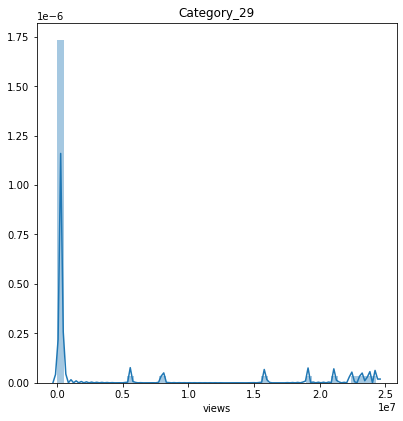

In [86]:
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
sns.distplot(youtube29['views'], ax = axes)
axes.set_title('Category_29')

In [87]:
try_normal(youtube29['views'])['Shapiro (P-value)']

3.174725022800362e-13

In [88]:
try_normal(youtube10['views'])

/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'Test statistic': 1190.1770512259227},
 'Shapiro (P-value)': 0.0,
 'K^2 (P-value)': 0.0}

In [89]:
def qqplot(data,title):
    sm.qqplot(data, line = '45')
    plt.title(title)
    pylab.show()

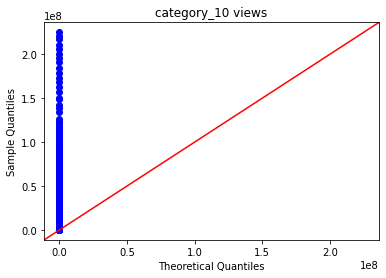

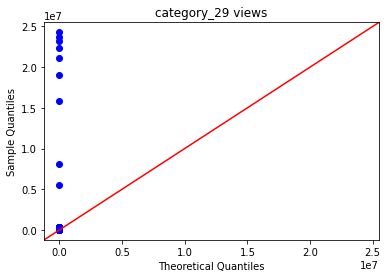

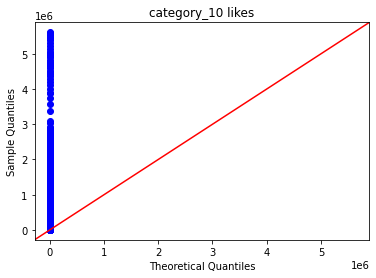

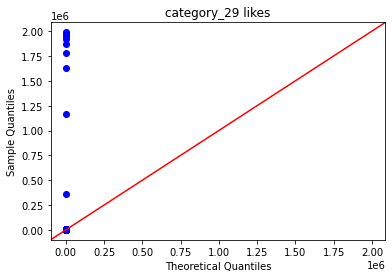

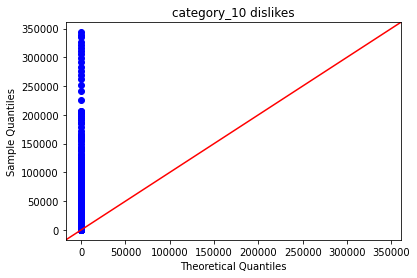

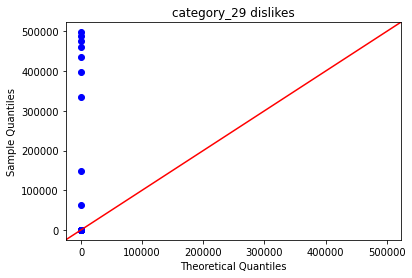

In [90]:
List = ['views', 'likes', 'dislikes']

for i in List:
    qqplot(youtube10[i], 'category_10 {}'.format(i))
    qqplot(youtube29[i], 'category_29 {}'.format(i))

In [91]:
try_normal(youtube29['views'])

for i in ['views','likes','dislikes']:
    print('{} di category29'.format(i))
    print(try_normal(youtube29[i]))
    print('{} di category10'.format(i))
    print(try_normal(youtube10[i]))
    print('\n')


views di category29
{'Anderson': {15.0: 0.542, 10.0: 0.617, 5.0: 0.741, 2.5: 0.864, 1.0: 1.028, 'Test statistic': 15.03917848327174}, 'Shapiro (P-value)': 3.174725022800362e-13, 'K^2 (P-value)': 7.110325304841888e-09}
views di category10
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.917, 1.0: 1.091, 'Test statistic': 1190.1770512259227}, 'Shapiro (P-value)': 0.0, 'K^2 (P-value)': 0.0}


likes di category29
{'Anderson': {15.0: 0.542, 10.0: 0.617, 5.0: 0.741, 2.5: 0.864, 1.0: 1.028, 'Test statistic': 15.770348198612865}, 'Shapiro (P-value)': 2.335269564529563e-13, 'K^2 (P-value)': 4.61018340359511e-08}
likes di category10
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.917, 1.0: 1.091, 'Test statistic': 1059.63100476604}, 'Shapiro (P-value)': 0.0, 'K^2 (P-value)': 0.0}


dislikes di category29
{'Anderson': {15.0: 0.542, 10.0: 0.617, 5.0: 0.741, 2.5: 0.864, 1.0: 1.028, 'Test statistic': 15.941865855475584}, 'Shapiro (P-value)': 1.6795371788214802e-13, 'K^2 (P-value

/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Dari data di atas, disimpulkan bahwa data tidak mengikuti Distribusi Normal. Maka saya akan menggunakan tes non-parametrik.

In [92]:
for i in ['views','likes','dislikes']:
    hasil = list(mannwhitneyu(youtube10[i], youtube29[i]))
    print(i)
    print('MannWhitneyU-Statistic:', hasil[0])
    print('P-Value:', hasil[1])
    print('\n')

views
MannWhitneyU-Statistic: 78978.5
P-Value: 4.876291818247057e-14


likes
MannWhitneyU-Statistic: 81875.0
P-Value: 2.2471001015367116e-13


dislikes
MannWhitneyU-Statistic: 91647.5
P-Value: 2.876019645817286e-11




# Significance test for MORE THAN TWO GROUPS

## One-Way ANOVA (FOR PARAMETRIC)

Background:<br>
With only two groups of observations we could compare the two group means using a t-test. When we have <b>MORE THAN TWO GROUPS,</b> it is inappropriate to simply compare each pair using a t-test because of the problem of multiple testing. The correct way to do the analysis is to use a one-way analysis of variance (ANOVAANOVA) to evaluate whether there is any evidence that the means of the populations differ.<br>

The one-way analysis of variance (ANOVA) is used to determine whether there are any <b>statistically significant differences between the means of three or more independent (unrelated) groups.</b> Basically, you’re testing groups to see if there’s a <b>difference between them.</b> 

<b>A one way ANOVA is used to compare two means from two independent (unrelated) groups using the F-distribution. The null hypothesis for the test is that the two means are equal. Therefore, a significant result means that the two means are unequal.</b>

<b>Assumption:</b>
* <b>The samples are independent.</b>
* <b>Each sample is from a normally distributed population.</b>
* <b>The population standard deviations of the groups are all equal.</b>  This property is known as <i>homoscedasticity</i>.


Interpretation:<br>
$H_{0}$: population mean all equal between the group <br>
$H_{1}$: at least one of the population mean between the group is not equal

In [93]:
youtube20 = youtube[youtube['category_id'] == 20]
youtube29 = youtube[youtube['category_id'] == 29]
youtube10 = youtube[youtube['category_id'] == 10]

In [94]:
from scipy.stats import f_oneway, kruskal

f_oneway(youtube10['views'], youtube29['views'], youtube20['views'])

F_onewayResult(statistic=22.988823625140867, pvalue=1.1148274978350597e-10)

### Tukey's Test (Post-hoc Test)

Since Tukey's test is a post-hoc test, we must first fit a linear regression model and perform ANOVA on the data.

If the ANOVAANOVA leads to a conclusion that there is evidence that the group means differ, we might then be interested in investigating which of the means are different. This is where the Tukey multiple comparison test is used. The test compares the difference between each pair of means with appropriate adjustment for the multiple testing. The results are presented as a matrix showing the result for each pair, either as a P-value or as a conÆdence interval. 

The Tukey multiple comparison test, like both the t-test and ANOVAANOVA, assumes that the data from the different groups come from populations where the observations have a normal distribution and the standard deviation is the same for each group.


In [95]:
from pingouin import pairwise_tukey

In [96]:
youtube_10_20_29 = youtube[(youtube['category_id'] ==10) | (youtube['category_id'] ==20) | (youtube['category_id'] ==29)]


pairwise_tukey(data = youtube_10_20_29, dv = 'views', between = 'category_id')

# T => Tes Statistik
# p-tukey => P-value Tukey
# H0 : tidak ada perbedaan.

/home/user/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.3, the latest is 0.3.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,10,20,6201003.12,2620830.63,3580172.489,540755.504,two-sided,6.621,0.001000,0.246
1,10,29,6201003.12,2963884.07,3237119.049,1937599.027,two-sided,1.671,0.216797,0.222
2,20,29,2620830.63,2963884.07,-343053.440,1995283.062,two-sided,-0.172,0.900000,-0.024


## Welch’s ANOVA

Welch’s ANOVA compares two means to see if they are equal. It is an alternative to the Classic ANOVA and can be used even if your data <b>violates the assumption of homogeneity of variances (<i>No Homoscedasticity</i>).</b>

<b>-Homogeneity of variance</b> means equal variances between independent groups.

In [97]:
from pingouin import welch_anova
#welch_anova variansinya tidak equal

In [98]:
bartlett(youtube10['views'], youtube29['views'], youtube20['views'])

BartlettResult(statistic=1793.1708442941126, pvalue=0.0)

In [99]:
levene(youtube10['views'], youtube29['views'], youtube20['views'])

LeveneResult(statistic=25.10777442642818, pvalue=1.358148958520443e-11)

In [100]:
youtube_10_20_29 = youtube[(youtube['category_id'] ==10) | (youtube['category_id'] ==20) | (youtube['category_id'] ==29)]

welch_anova(data = youtube_10_20_29, dv = 'views', between = 'category_id')

,Source,ddof1,ddof2,F,p-unc
0,category_id,2,150.976,129.873,1.548307e-33


### Games Howell Test (Post-hoc Test)

Games-Howell post-hoc tests for Welch's one-way analysis of variance (ANOVA). <br>

Performs Games-Howell test, which is used to compare all possible combinations of group differences when the assumption of homogeneity of variances is violated. 

In [101]:
from pingouin import pairwise_gameshowell

Tentang Effect Size
https://www.statisticssolutions.com/statistical-analyses-effect-size/

In [102]:
pairwise_gameshowell(data = youtube_10_20_29, dv = 'views', between = 'category_id')

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
0,10,20,6201003.12,2620830.63,3580172.489,156832.668,two-sided,16.142,6125.549,0.001000,0.599
1,10,29,6201003.12,2963884.07,3237119.049,681572.891,two-sided,3.358,60.731,0.002461,0.447
2,20,29,2620830.63,2963884.07,-343053.440,672464.548,two-sided,-0.361,57.549,0.900000,-0.049


## Kruskal-Wallis (FOR NON-PARAMETRIC) 

The Kruskal Wallis test is the <b><i>non parametric</i> alternative to the One Way ANOVA.</b> Non parametric means that the test doesn’t assume your data comes from a particular distribution.

<b>The Kruskal Wallis test will tell you if there is a significant difference between groups. However, it won’t tell you which groups are different.</b>

<b>Assumptions:</b>
* <b>One independent variable with two or more levels (independent groups).</b> The test is more commonly used when you have three or more levels. For two levels, consider using the Mann Whitney U Test instead.
* <b>Ordinal scale, Ratio Scale or Interval scale dependent variables.</b>
* <b>Your observations should be independent.</b> In other words, there should be no relationship between the members in each group or between groups. For more information on this point, see: Assumption of Independence.
* <b>It has no distributional assumptions.</b> If it used to compare medians, the distributions must be similar apart from their locations. 


Interpretation:<br>
$H_{0}$: population median of all of the groups are equal.<br>
$H_{1}$: population median of at least one of the group are not equal.


In [103]:
from scipy.stats import kruskal

kruskal(youtube10['views'], youtube29['views'], youtube20['views'])

KruskalResult(statistic=57.21993458049006, pvalue=3.757068198005064e-13)

### Post Hoc Test
If Paired is True it used Wilcoxon Test, if not it used Mann-Whitney Test.

In [104]:
from pingouin import pairwise_ttests

#Post hoc, jika paired pakai Wilcoxon kalau tidak pakai Mann-Whitney
pairwise_ttests(data = youtube_10_20_29, dv = 'views', between = 'category_id', parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,category_id,10,20,False,False,2721072.5,two-sided,1.728277e-01,0.245
1,category_id,10,29,False,False,289925.5,two-sided,9.752584e-14,0.210
2,category_id,20,29,False,False,36507.5,two-sided,7.204730e-13,-0.096


Dictionary: <br>
'p-unc' : uncorelate p-value <br>
'U-val' : U-test (tes statistik Wilcoxon atau Whitney)<br>
<br>

Hasil dari tabel di atas:<br>
Category 10 sama 20 tidak ada perbedaan (H0 diterima)<br>
$H_{0}$ : Tidak ada perbedaan atau pengaruh<br>
$H_{1}$ : Ada perbedaan atau pengaruh<br>


# Question

How about season publish time? Would there any differences in Viewer, Likes, and Dislike? 

US have 4 season
Spring runs from March to May;
Summer runs from June to August;
Fall (autumn) runs from September to November; and
Winter runs from December to February.

In [105]:
def season(x):
    if x.month in range(3,6):
        return 'Spring'
    elif x.month in range(6,9):
        return 'Summer'
    elif x.month in range(9,12):
        return 'Fall'
    else:
        return 'Winter'

In [106]:
youtube.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'trending_gap',
       'title_total_word', 'description_total_word', 'like_delta'],
      dtype='object')

In [107]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                40949 non-null  object        
 1   trending_date           40949 non-null  datetime64[ns]
 2   title                   40949 non-null  object        
 3   channel_title           40949 non-null  object        
 4   category_id             40949 non-null  int64         
 5   publish_time            40949 non-null  datetime64[ns]
 6   tags                    40949 non-null  object        
 7   views                   40949 non-null  int64         
 8   likes                   40949 non-null  int64         
 9   dislikes                40949 non-null  int64         
 10  comment_count           40949 non-null  int64         
 11  thumbnail_link          40949 non-null  object        
 12  comments_disabled       40949 non-null  bool  

In [108]:
youtube['season'] = youtube['publish_time'].apply(season)

In [109]:
youtube.head(4)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,title_total_word,description_total_word,like_delta,season
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,34,1410,54561,Fall
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",1,62,630,91039,Fall
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2,53,1177,140694,Fall
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,1,32,1403,9506,Fall


In [110]:
for i in ['views','likes','dislikes']:
    for j in ['Spring', 'Summer','Fall','Winter']:
        print('{} {}'.format(i,j))
        print(try_normal(youtube[youtube['season']==j][i])) 
        print('\n')

views Spring
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'Test statistic': 3716.1813218754905}, 'Shapiro (P-value)': 0.0, 'K^2 (P-value)': 0.0}


views Summer
{'Anderson': {15.0: 0.573, 10.0: 0.653, 5.0: 0.783, 2.5: 0.913, 1.0: 1.087, 'Test statistic': 104.89138809636574}, 'Shapiro (P-value)': 5.047589172375137e-40, 'K^2 (P-value)': 1.1802462873285782e-131}


views Fall
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'Test statistic': 1076.0919247755273}, 'Shapiro (P-value)': 0.0, 'K^2 (P-value)': 0.0}


views Winter
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'Test statistic': 3746.367311313432}, 'Shapiro (P-value)': 0.0, 'K^2 (P-value)': 0.0}


likes Spring


/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'Test statistic': 3560.9829258459213}, 'Shapiro (P-value)': 0.0, 'K^2 (P-value)': 0.0}


likes Summer
{'Anderson': {15.0: 0.573, 10.0: 0.653, 5.0: 0.783, 2.5: 0.913, 1.0: 1.087, 'Test statistic': 164.14229803337196}, 'Shapiro (P-value)': 2.802596928649634e-45, 'K^2 (P-value)': 5.1677471996842025e-164}


likes Fall
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'Test statistic': 1086.661115004069}, 'Shapiro (P-value)': 0.0, 'K^2 (P-value)': 0.0}


likes Winter
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'Test statistic': 3660.3000707251012}, 'Shapiro (P-value)': 0.0, 'K^2 (P-value)': 0.0}


dislikes Spring
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'Test statistic': 4208.591164547299}, 'Shapiro (P-value)': 0.0, 'K^2 (P-value)': 0.0}


dislikes Summer
{'Anderson': {15.0: 0.573, 10.0: 0.653, 5.0: 0.783, 2.5: 0.913, 1.0: 1

/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/home/user/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [111]:
from scipy.stats import levene, bartlett

youtubef = youtube[youtube['season']=='Fall']
youtubes = youtube[youtube['season']=='Summer']
youtubew = youtube[youtube['season']=='Winter']
youtubesp = youtube[youtube['season']=='Spring']



for i in ['views','likes','dislikes']:
    print(i)
    print(levene(youtubef[i],youtubes[i],youtubew[i],youtubesp[i]))
    print('\n')

views
LeveneResult(statistic=231.13593917804192, pvalue=1.0199641428047364e-148)


likes
LeveneResult(statistic=199.16023845826678, pvalue=3.047203619464923e-128)


dislikes
LeveneResult(statistic=12.664904236686523, pvalue=2.857565325923137e-08)




In [112]:
from pingouin import kruskal

for i in ['views','likes','dislikes']:
    print(kruskal(data = youtube, dv = i, between = 'season' ))
    print('\n')

         Source  ddof1         H  p-unc
Kruskal  season      3  7047.097    0.0


         Source  ddof1         H  p-unc
Kruskal  season      3  5308.643    0.0


         Source  ddof1         H  p-unc
Kruskal  season      3  4673.572    0.0




In [113]:
pairwise_ttests(data = youtube, dv = 'views', between = 'season', parametric = False)[['A','B','p-unc']]

,A,B,p-unc
0,Fall,Spring,0.000000e+00
1,Fall,Summer,3.671005e-126
2,Fall,Winter,8.300967e-11
3,Spring,Summer,1.134166e-03
4,Spring,Winter,0.000000e+00
5,Summer,Winter,3.980226e-121


In [114]:
pairwise_ttests(data = youtube, dv = 'likes', between = 'season', parametric = False)[['A','B','p-unc']]

,A,B,p-unc
0,Fall,Spring,0.000000e+00
1,Fall,Summer,6.920625e-102
2,Fall,Winter,1.221096e-06
3,Spring,Summer,1.298305e-04
4,Spring,Winter,0.000000e+00
5,Summer,Winter,4.104912e-100


In [115]:
pairwise_ttests(data = youtube, dv = 'dislikes', between = 'season', parametric = False)[['A','B','p-unc']]

,A,B,p-unc
0,Fall,Spring,0.000000e+00
1,Fall,Summer,1.547882e-120
2,Fall,Winter,1.615794e-19
3,Spring,Summer,2.323327e-12
4,Spring,Winter,0.000000e+00
5,Summer,Winter,1.106743e-106


Interpretasi:<br>
$H_{0}$ : Publish video di musim apapun, tidak membuat perbedaan dalam views, likes, dan dislikes.<br>
$H_{1}$ : Publish video di musim apapun, membuat perbedaan dalam views, likes, dan dislikes.<br>
Oleh karena uji di atas, maka adanya perbedaan dalam views, likes dan dislikes.<br>

Maka dari tes di atas, null hipotesis ditolak. Yang artinya, mungkin ada perbedaan dalam views, likes, dan dislikes saat mempublish video di suatu musim.

In [116]:
for i in youtube['season'].unique():
    print('Jumlah data musim {} ada {}'.format(i, len(youtube[youtube['season']==i])))

Jumlah data musim Fall ada 4305
Jumlah data musim Spring ada 17948
Jumlah data musim Summer ada 805
Jumlah data musim Winter ada 17891


Text(0.5, 1.0, 'Dislikes')

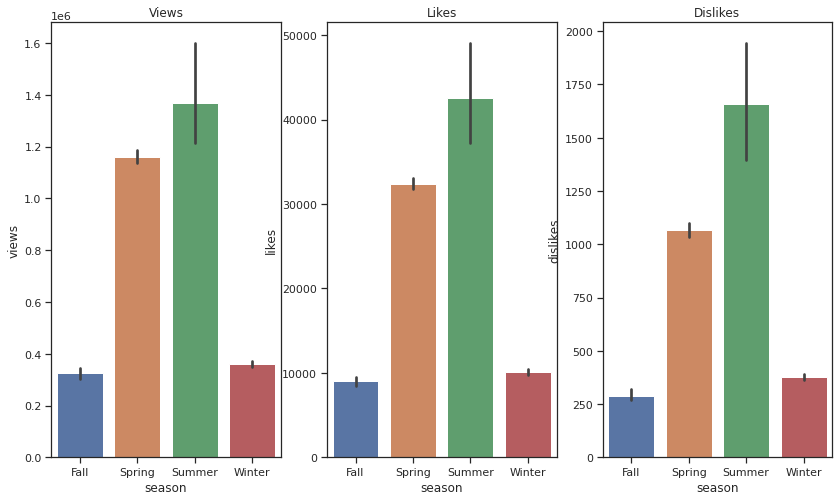

In [117]:
plt.figure(figsize =(14,8))
plt.subplot(1,3,1)
sns.barplot(data = youtube, x = 'season', y ='views', estimator = np.median)
plt.title('Views')
plt.subplot(1,3,2)
sns.barplot(data = youtube, x = 'season', y ='likes', estimator = np.median)
plt.title('Likes')
plt.subplot(1,3,3)
sns.barplot(data = youtube, x = 'season', y ='dislikes', estimator = np.median)
plt.title('Dislikes')

# Multivariate Analysis

## Pearson & Spearman Correlation

### Pearson's Correlation

The Pearson correlation coefficient measures the <b>linear relationship between two datasets.</b> Strictly speaking, Pearson’s correlation <b>requires</b> that each dataset be <b>normally distributed</b>. Correlations of -1 or +1 imply an exact linear relationship.

![linear](https://www.emathzone.com/wp-content/uploads/2014/10/linear-nonlinear-corrrelation.jpg)

Consider a dataset with two features: x and y. Each feature has n values, so x and y are n-tuples. Say that the first value x₁ from x corresponds to the first value y₁ from y, the second value x₂ from x to the second value y₂ from y, and so on. Then, there are n pairs of corresponding values: (x₁, y₁), (x₂, y₂), and so on. Each of these x-y pairs represents a single observation.

The **Pearson (product-moment) correlation coefficient** is a measure of the linear relationship between two features. It’s the ratio of the covariance of x and y to the product of their standard deviations.

Here are some important facts about the Pearson correlation coefficient:

-    The Pearson correlation coefficient can take on any real value in the range −1 ≤ r ≤ 1.

-    The maximum value r = 1 corresponds to the case when there’s a perfect positive linear relationship between x and y. In other words, larger x values correspond to larger y values and vice versa.

-    The value r > 0 indicates positive correlation between x and y.

-    The value r = 0 corresponds to the case when x and y are independent.

-    The value r < 0 indicates negative correlation between x and y.

-    The minimal value r = −1 corresponds to the case when there’s a perfect negative linear relationship between x and y. In other words, larger x values correspond to smaller y values and vice versa.

| Pearson’s r Value | Correlation Between x and y |
| --- | --- |
| equal to 1 | perfect positive linear relationship |
| greater than 0 |  positive correlation |
| equal to 0 | independent |
| less than 0 | negative correlation |
| equal to -1 | perfect negative linear relationship |

![linear](https://saylordotorg.github.io/text_introductory-statistics/section_14/07aa5db140b70615a15e8631c2d7a2c4.jpg)

### Spearman Correlation

The Spearman correlation is a <b>nonparametric measure of the monotonicity of the relationship (non-linear relationship) between two datasets</b>. Unlike the Pearson correlation, the Spearman correlation does <b>not assume that both datasets are normally distributed</b>. Correlations of -1 or +1 imply an exact monotonic relationship.

The Spearman correlation coefficient between two features is the Pearson correlation coefficient between their rank values. It’s calculated the same way as the Pearson correlation coefficient but takes into account their ranks instead of their values. It’s often denoted with the Greek letter rho (ρ) and called Spearman’s rho.

Say you have two n-tuples, x and y, where (x₁, y₁), (x₂, y₂), … are the observations as pairs of corresponding values. You can calculate the Spearman correlation coefficient ρ the same way as the Pearson coefficient. You’ll use the ranks instead of the actual values from x and y.

Here are some important facts about the Spearman correlation coefficient:

-    It can take a real value in the range −1 ≤ ρ ≤ 1.

-    Its maximum value ρ = 1 corresponds to the case when there’s a monotonically increasing function between x and y. In other words, larger x values correspond to larger y values and vice versa.

-    Its minimum value ρ = −1 corresponds to the case when there’s a monotonically decreasing function between x and y. In other words, larger x values correspond to smaller y values and vice versa.


#### Rank Correlation

**Rank correlation** compares the ranks or the orderings of the data related to two variables or dataset features. If the orderings are similar, then the correlation is strong, positive, and high. However, if the orderings are close to reversed, then the correlation is strong, negative, and low. In other words, rank correlation is concerned only with the order of values, not with the particular values from the dataset.

To illustrate the difference between linear and rank correlation, consider the following figure:

![rank](https://files.realpython.com/media/py-corr-2.ac1acc7812d0.png)

The left plot has a perfect positive linear relationship between x and y, so r = 1. The central plot shows positive correlation and the right one shows negative correlation. However, neither of them is a linear function, so r is different than −1 or 1.

When you look only at the orderings or ranks, all three relationships are perfect! The left and central plots show the observations where larger x values always correspond to larger y values. This is perfect positive rank correlation. The right plot illustrates the opposite case, which is perfect negative rank correlation.

In [118]:
from pingouin import corr

In [119]:
youtube[['views','dislikes']].corr('spearman')

,views,dislikes
views,1.000000,0.854176
dislikes,0.854176,1.000000


In [120]:
corr(youtube['views'],youtube['dislikes'],method = 'spearman')
#H0 : Tidak ada hubungan secara non-linier (kalau spearman)
#H0 : Tidak ada hubungan secara linier (Kalau Pearson)

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,40949,0.854,"[0.85, 0.86]",0.73,0.73,0.0,1.0


## Cramers_v and Correlation_ratio

In [121]:
import scipy.stats as ss

#Correlation measurement untuk data discrete dan continous
def correlation_ratio(categories, measurement):
    fcat,_ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array, y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurement,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

#Correlation measurement untuk data discrete dan discrete
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))



### Correlation Ratio (Correlation Between Categorical Feature and Continous Feature)

But what about a pair of a continuous feature and a categorical feature? For this, we can use the Correlation Ratio (often marked using the greek letter eta).

Mathematically, it is defined as the weighted variance of the mean of each category divided by the variance of all samples; in human language, the Correlation Ratio answers the following question: **Given a continuous number how well can you know to which category it belongs to?**, Just like the two coefficients we’ve seen before, here too the output is on the range of [0,1].

In [122]:
correlation_ratio(youtube['category_id'],youtube['views'])
#Correlation_ratio menghasilkan value antar 0 hingga 1
#Semakin mendekati 0 tidak ada hubungannya
#Semakin mendekati 1 ada hubungannya

0.23957517402805997

### Cramers Correlation (Correlation Between Categorical Features)

It is based on a nominal variation of Pearson’s Chi-Square Test, and comes built-in with some great benefits:

-    Similarly to correlation, the output is in the range of [0,1], where **0 means no association and 1 is full association**. (Unlike correlation, there are no negative values, as there’s no such thing as a negative association. Either there is, or there isn’t)
-    Like correlation, Cramer’s V is symmetrical — it is insensitive to swapping x and y

In [139]:
cramers_v(youtube['category_id'],youtube['season'])
#Cramers_V menghasilkan value antar 0 hingga 1
#Semakin mendekati 0 tidak ada hubungannya
#Semakin mendekati 1 ada hubungannya

0.09792604656360905

## Multivariate Outlier

In [124]:
# For example if we want to find outlier between 3 columns

youtube_out_test = youtube[['views', 'likes', 'dislikes']]

In [125]:
from mahalanobis import Mahalanobis
#Mahalanobis melihat adanya outlier atau tidak 

In [126]:
youtube_out_test['mahala_pack'] = Mahalanobis(np.array(youtube_out_test), len(youtube_out_test)).distances

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
youtube_out_test.head()

,views,likes,dislikes,mahala_pack
0,748374,57527,2966,0.311529
1,2418783,97185,6146,0.191899
2,3191434,146033,5339,0.429749
3,343168,10172,666,0.290097
4,2095731,132235,1989,0.547969


In [128]:
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)

#Mahala distance more than 9.21 is considered as outlier with chi2 dist and df = 2 (number of cols)
#if using P-value then the H0 is Not outlier and the H1 is outlier

9.21034037197618

In [129]:
youtube_out_test['p-value'] = 1 - chi2.cdf(youtube_out_test['mahala_pack'], 2)

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
def name_outlier(col):
    if col < 0.01:
        return 'Outlier'
    else:
        return 'Not-outlier'
youtube_out_test['Out'] = youtube_out_test['p-value'].apply(name_outlier)

/home/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


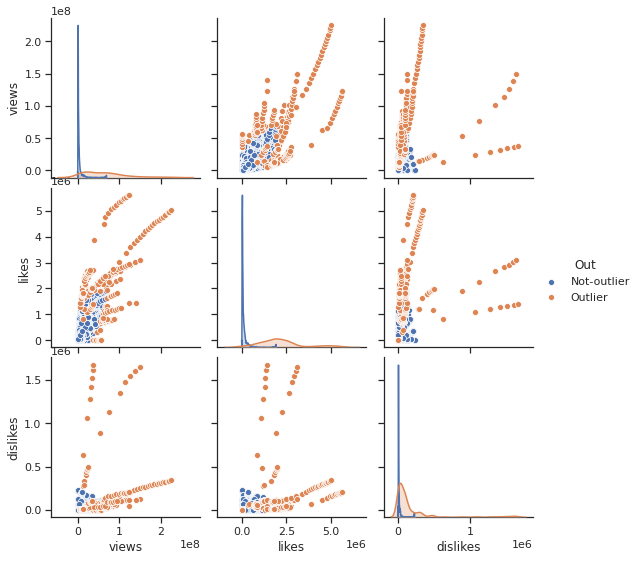

In [131]:
sns.pairplot(youtube_out_test[['views', 'likes', 'dislikes', 'Out']], hue = 'Out')

In [132]:
# youtube['out_vld'] = youtube_out_test['Out']
# sns.pairplot(data = youtube, hue = 'out_vld')

## Chi-Squared (Significance Test between Cateorical Features)

The Pearson chi-square test essentially tells us whether the results of a crosstab are statistically significant. 

>That is, are the TWO categorical variables independent (unrelated) of one another. <b>So basically, the chi square test is a correlation test for CATEGORICAL variables.</b> 

Interpretation: 

* We test the null hypothesis that nothing interesting is happening (i.e., there is no relationship) versus alternative hypothesis that findings are interesting (i.e., there is a relationship).
* The null hypothesis can only be rejected if there is a .05 or lower probability that our findings are due to chance 

### CrossTab

A crosstab is a table showing the relationship between two or more variables. Where the table only shows the relationship between two categorical variables, a crosstab is also known as a <i>contingency table</i>.

In statistics, a contingency table (also known as a cross tabulation or crosstab) is a type of table in a matrix format that displays <b>the (multivariate) frequency distribution</b> of the variables.

> Bassically, Crosstabulation is a table that has displays the frequency between two (or more) categorical variables (or Features).  



In [133]:
from scipy.stats import chi2_contingency

pd.crosstab(youtube['category_id'], youtube['season'])

season,Fall,Spring,Summer,Winter
category_id,,,,
1,232,991,71,1051
2,79,50,0,255
10,730,3071,153,2518
15,76,360,0,484
17,223,987,27,937
19,27,136,11,228
20,33,463,68,253
22,311,1392,44,1463
23,410,1516,41,1490


In [134]:
# Biasanya chi2 dipakai untuk categorical dengan categorical.

chi2_contingency(pd.crosstab(youtube['category_id'], youtube['season']))
#H0: Tidak ada hubungan atau tidak ada pengaruh satu sama lain
#H1: Ada pengaruh atau ada hubungan

# matriks dibawah adalah teorinya atau ekpektasinya. 
#Sedangkan pd.crosstab di atas, adalah observasinya.

(1222.9573993867102,
 9.633940891446709e-227,
 45,
 array([[2.46531661e+02, 1.02781655e+03, 4.60994163e+01, 1.02455237e+03],
        [4.03702166e+01, 1.68307700e+02, 7.54890229e+00, 1.67773181e+02],
        [6.80406359e+02, 2.83668602e+03, 1.27230457e+02, 2.82767716e+03],
        [9.67203106e+01, 4.03237197e+02, 1.80859117e+01, 4.01956580e+02],
        [2.28554299e+02, 9.52867030e+02, 4.27377958e+01, 9.49840875e+02],
        [4.22625705e+01, 1.76197123e+02, 7.90275709e+00, 1.75637549e+02],
        [8.58918411e+01, 3.58092163e+02, 1.60610760e+01, 3.56954920e+02],
        [3.37469779e+02, 1.40694718e+03, 6.31041051e+01, 1.40247894e+03],
        [3.63437080e+02, 1.51520760e+03, 6.79597792e+01, 1.51039554e+03],
        [1.04752302e+03, 4.36723417e+03, 1.95878288e+02, 4.35336453e+03],
        [2.61460231e+02, 1.09005534e+03, 4.88909375e+01, 1.08659349e+03],
        [4.35872182e+02, 1.81719720e+03, 8.15045544e+01, 1.81142607e+03],
        [1.74096559e+02, 7.25826955e+02, 3.25546411e+01, 7.23

In [140]:
print('P-value : {}'.format(chi2_contingency(pd.crosstab(youtube['category_id'], youtube['season']))
[1]))

P-value : 9.633940891446709e-227


# One Hot Encoding

In [135]:
dummies = pd.get_dummies(youtube['season'])
dummies
#One-hot encoding

,Fall,Spring,Summer,Winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
40944,0,1,0,0
40945,0,1,0,0
40946,0,1,0,0
40947,0,1,0,0


In [136]:
pd.crosstab(youtube['category_id'], dummies['Fall'])

Fall,0,1
category_id,,
1,2113,232
2,305,79
10,5742,730
15,844,76
17,1951,223
19,375,27
20,784,33
22,2899,311
23,3047,410


In [137]:

dummies = pd.get_dummies(youtube['season'])
bon_p_value = 0.05/youtube['season'].nunique()

for cols in dummies:
    if chi2_contingency(pd.crosstab(youtube['category_id'], dummies[cols]))[1] < bon_p_value:
        print('{} is to Reject Null Hypothesis'.format(cols))
    else:
        print('{} fail to Reject Null Hypothesis'.format(cols))

Fall is to Reject Null Hypothesis
Spring is to Reject Null Hypothesis
Summer is to Reject Null Hypothesis
Winter is to Reject Null Hypothesis


In [138]:
dummies = pd.get_dummies(youtube['category_id'])
bon_p_value = 0.05/youtube['category_id'].nunique()

for cols in dummies:
    if chi2_contingency(pd.crosstab(youtube['season'], dummies[cols]))[1] < bon_p_value:
        print('{} is to Reject Null Hypothesis'.format(cols))
    else:
        print('{} fail to Reject Null Hypothesis'.format(cols))

1 is to Reject Null Hypothesis
2 is to Reject Null Hypothesis
10 is to Reject Null Hypothesis
15 is to Reject Null Hypothesis
17 fail to Reject Null Hypothesis
19 is to Reject Null Hypothesis
20 is to Reject Null Hypothesis
22 fail to Reject Null Hypothesis
23 is to Reject Null Hypothesis
24 is to Reject Null Hypothesis
25 is to Reject Null Hypothesis
26 is to Reject Null Hypothesis
27 is to Reject Null Hypothesis
28 is to Reject Null Hypothesis
29 is to Reject Null Hypothesis
43 is to Reject Null Hypothesis
